In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd
import math
import scipy.integrate as integrate

# Stock price 

Assuming a stock price follows a process $ùëÜ_ùë° = ùëÜ_{ùë°‚àí1} * ùëí^ùëü_ùë°$. Weekly returns $ùëü_ùë°$ are normally distributed with $ùëü_ùë° ‚àº ùëÅ(0.005, 0.03^2)$ (all parameters per week; no further scaling required).  
Using Monte Carlo Simulation to answer the following questions for $ùëá = 13$ and $ùëá = 52$ weeks (quarter / whole year):

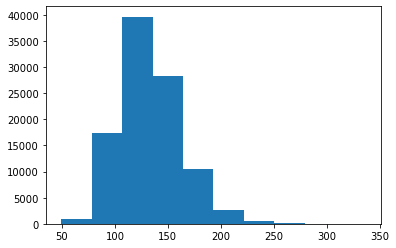

E_S_T for T=52 is: 132.72733539880963
prob_below_90 with T=52 is: 0.04614


In [2]:
mu = 0.005 # mean daily return
sig = 0.03 #std.d
#T=13 T=52
T=52
nPath = 100000 
S_0 = 100. 
r = rd.randn(T,nPath)*sig + mu
#---------------------------------------------
S = np.full((T+1,nPath),S_0)
#---------------------------------------------
for t in range(T):
    S[t+1] = S[t]*np.exp(r[t])
S_T = S[-1,:]
#-------------------------------------------
plt.hist(S_T),90
plt.show()
E_S_T=np.mean(S_T)  
print('E_S_T for T=52 is:', E_S_T)

prob_below_90 = np.mean(S_T<90)
print('prob_below_90 with T=52 is:',prob_below_90)



>**a)** If $ùëÜ_0 = 100$, what is $ùê∏(ùëÜ_ùëá)$?

        E_S_T for T=13 is: 106.71436763356196
        E_S_T for T=52 is: 129.6998214055812
    

>**b)** What is the probability that of $ùëÜ_ùëá<l90$?

         =>prob_below_90 with T=13 is: 0.05709
         =>prob_below_90 with T=52 is: 0.0449
     


>**c)** What is the probability of $100 \le ùëÜ_T \le 130$?

        prob_less_100_T13 = 0.27289
        prob_less_130_T13 = 0.96711
        prob_less_100_T13 - prob_less_130_T13 = 0.69422

        prob_less_100_T52 = 0.11449
        prob_less_130_T52 = 0.50211
        prob_less_100_T52 - prob_less_130_T52 = 0.38762
        
        =>prob_between_100_and_130 with T=13 is: 0.69422
        =>prob_between_100_and_130 with T=52 is: 0.38762


# Wealth distribution

The Lorenz curve represents the wealth or income distribution where, typically, the x-axis the cumulative fraction of the total population (from lowest to highest wealth and income, respectively), and the y-axis the cumulative share of total wealth and income, respectively.
<br>The Gini coefficient<br>
$ G = 2\int^1_0(x-L(x))\,d_x = \frac{A}{A+B} $

measures inequality in that distribution, where $ùê∫ = 0\ (ùê∫ = 1)$ indicates perfect equality (perfect inequality with the last household owning / earning everything).  <br>Hint/Sanity check: $ùê¥ + ùêµ = ...?$

>**a)** Implementing a function $Gini(L)$ where the input argument L is a function for the Lorenz curve $ùêø(ùë•)$, and which returns the Gini coefficient and the areas ùê¥ and ùêµ.

In [3]:
gdp_decile_percents = [0.49, 0.59, 0.69, 0.79, 1.89, 2.55, 5.0, 10.0, 18.0, 60.0]
print('Percents sum to 100:', sum(gdp_decile_percents) == 100)
    
gdp_decile_shares = [i/100 for i in gdp_decile_percents]
    
# Convert to quintile
gdp_quintile_shares = [(gdp_decile_shares[i] + gdp_decile_shares[i+1]) for i in range(0, len(gdp_decile_shares), 2)]
    
# Insert 0 for the first value in the Lorenz curve
gdp_quintile_shares.insert(0, 0)
print(gdp_quintile_shares)
    
# Cumulative sum of shares (Lorenz curve values)
shares_cumsum = np.cumsum(a=gdp_quintile_shares, axis=None)
print(shares_cumsum)
    
# Perfect equality line
pe_line = np.linspace(start=0.0, stop=1.0, num=len(shares_cumsum))
print(pe_line)

# lorenz area
area_under_lorenz_B = np.trapz(y=shares_cumsum, dx=1/len(shares_cumsum))
# perfect equality area
area_under_pe_A_B = np.trapz(y=pe_line, dx=1/len(shares_cumsum))
print('Area A+B:',area_under_pe_A_B)
print('Area B:',area_under_lorenz_B)
print('Area A:', area_under_pe_A_B - area_under_lorenz_B)
    
gini = (area_under_pe_A_B - area_under_lorenz_B) / area_under_pe_A_B
print('Gini coefficient:', gini)

Percents sum to 100: True
[0, 0.0108, 0.0148, 0.044399999999999995, 0.15000000000000002, 0.78]
[0.     0.0108 0.0256 0.07   0.22   1.    ]
[0.  0.2 0.4 0.6 0.8 1. ]
Area A+B: 0.41666666666666663
Area B: 0.13773333333333332
Area A: 0.2789333333333333
Gini coefficient: 0.66944


> **b)** Using this function Gini(L), find the Gini coefficient when $ùêø(ùë•) = 0.7 ‚ãÖ ùë•^{2.5} + 0.3 ‚ãÖ ùë•^{1.2}$


In [4]:
def f(x):
    return x

def G(x):
    return 0.7*ùë•**2.5 + 0.3*ùë•**1.2
integrate.quad(lambda x:f(x)-G(x),0,1)[0]


0.16363636364694803

# Optimal combination of two assets

A financial investor wants to find the optimal combination of two assets. The annual return for both assets can be assumed to be normally distributed. Asset ùê¥ has an expected return of $ùëü_ùê¥ = 0.05$ and a standard deviation of $ùúé_ùê¥ = 0.2$; for ùêµ, the parameters are $ùëü_ùêµ = 0.1$ and $ùúé_ùêµ = 0.3$; both assets are perfectly uncorrelated. If investor uses a fraction of $ùë§_ùê¥$ of their budget for asset ùê¥ (and the remaining $(1 ‚àí ùë§_ùê¥)$ for asset ùêµ), the resulting portfolio statistics are <br>
            $ùëü_ùëÉ = ùë§_ùê¥ ‚ãÖ ùëüùê¥ + (1 ‚àí ùë§_ùê¥) ‚ãÖ ùëü_B$ <br>
            $ùúé_ùëÉ = \sqrt{ùë§_A^2.ùúé_A^2 + (1-ùë§_A)^2.ùúé_B^2}$
<br>
The investor considers two criteria (objective functions, both to be maximized):<br>
>utility-based:  $ùëà_ùëù = (1 ‚àí ùõæ) ‚ãÖ ùëü_ùëÉ ‚àí ùõæ ‚ãÖ ùúé_P$<br>
>Share Ratio: $ùëÜùëÖ_ùëù = (ùëü_ùëÉ ‚àí ùëü_ùëì)/ùúé_P$

where $ùëü_ùëì$ is the riskfree rate (assume: $ùëü_ùëì = 0$) and ùõæ is a parameter of risk aversion (assume: $ùõæ = 0.7$).

>**a)** Implementing functions util(wA) and SR(wA) that return $ùëà_ùëù$ and $ùëÜùëÖ_ùëÉ$, respectively, and take $ùë§_ùê¥$ as argument. (The risk aversion parameter ùõæ and the assets‚Äô parameters for ùëü and ùúé can be provided, e.g., as arguments
with default values or as global variables, but calling the functions with just one argument, $ùë§_ùê¥$, should return the correct values).

In [5]:
rA=0.05 #expexted return A
rB=0.1 #expected return B

def rp(s): return s*rA+(1-s)*rB

In [6]:
stdA = 0.2 #omega 
stdB = 0.3 #omega 
def std_p(ss): return np.sqrt(ss**2*stdA**2 + ((1-ss)**2)*stdB**2)
        

>**b)** Assuming that weights have to be non-negative, ie., $0 \le ùë§_ùê¥ \le 1$. Visualize the objective functions as functions of $ùë§_ùê¥$.


In [7]:
risk_aversion = 0.7 #
risk_free = 0
def util(wA):
    results_util = []
    for i in wA:
        final = (1-risk_aversion)*rp(i) - risk_aversion*std_p(i)
        results_util.append(final)
    return results_util


In [8]:

def SR(wA):
    results_SR=[]
    for i in wA:
        final2 = (rp(i)-risk_free)/std_p(i)
        results_SR.append(final2)
    return results_SR

In [9]:
n_points = 10000
wA = np.linspace(0.0,1.0)
wA

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [10]:
util(wA)

[-0.18,
 -0.1760402484763475,
 -0.1721218537233936,
 -0.1682474719164474,
 -0.16441996022915176,
 -0.16064239216915982,
 -0.1569180736797848,
 -0.15325055990560546,
 -0.14964367246855204,
 -0.14610151703644503,
 -0.1426285008861861,
 -0.1392293500667754,
 -0.13590912565130678,
 -0.13267323843100687,
 -0.12952746124831452,
 -0.12647793799185975,
 -0.12353118808856496,
 -0.12069410513521324,
 -0.11797394812672972,
 -0.11537832357998151,
 -0.11291515674560976,
 -0.11059265007855879,
 -0.10841922723865086,
 -0.10640346115706514,
 -0.10455398517256016,
 -0.10287938694341052,
 -0.10138808578942853,
 -0.10008819529575094,
 -0.09898737435935152,
 -0.09809267127769425,
 -0.09741036681910537,
 -0.09694582329605,
 -0.09670334729628843,
 -0.09668607374834462,
 -0.09689587830471291,
 -0.09733332361119172,
 -0.09799764299717541,
 -0.09888676267762193,
 -0.09999736098395226,
 -0.10132496074321082,
 -0.10286404897525048,
 -0.10460821676984229,
 -0.10655031162567266,
 -0.108682594657487,
 -0.1109968957

In [11]:
SR(wA)

[0.33333333333333337,
 0.3367730751508747,
 0.3402886292674572,
 0.3438780255207633,
 0.34753846450070425,
 0.3512661741916642,
 0.35505624756307513,
 0.3589024597432513,
 0.36279706373848125,
 0.36673056418866035,
 0.3706914694448733,
 0.37466602338632027,
 0.3786379199451738,
 0.3825880053630144,
 0.38649397584049855,
 0.3903300815216444,
 0.3940668516924145,
 0.3976708606148844,
 0.40110455839745796,
 0.40432619639721934,
 0.40728988134063576,
 0.40994579587496144,
 0.4122406246210728,
 0.41411822278067456,
 0.41552055765967894,
 0.4163889409316013,
 0.416665550344564,
 0.4162952139654227,
 0.4152273992686999,
 0.41341831622823944,
 0.41083301237016784,
 0.40744731390631045,
 0.4032494562130131,
 0.39824125363414586,
 0.3924386850477835,
 0.3858718165706449,
 0.3785840411477778,
 0.37063067846955117,
 0.3620770380738941,
 0.3529960946537213,
 0.3434659511328597,
 0.33356726950897214,
 0.3233808333817773,
 0.31298537435411494,
 0.30245575378327966,
 0.2918615485343313,
 0.28126605018

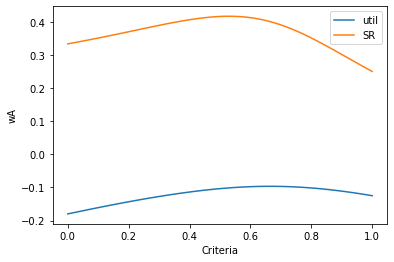

In [12]:
plt.plot(wA, util(wA), label='util')
plt.plot(wA, SR(wA), label='SR')
plt.xlabel('Criteria')
plt.ylabel('wA')
plt.legend(loc="upper right")
plt.show()

>**d)** Now, assuming that weights can also be negative within certain limits; specifically ‚Äúshort-selling‚Äù is allowed up to $200%$, $‚àí2.0 \le ùë§_ùê¥ \le 3.0.$ <br>
Visualizing SR again for these new bounds. Which of the numerical methods discussed in class can be used to reliably find (ie., are guaranteed to converge to) the maxima?

In [14]:
wA2 = np.linspace(-2.0,3.0)
util(wA2)
SR(wA2)


[0.20306923302672383,
 0.20544904443602652,
 0.20800789083725896,
 0.2107662632412861,
 0.21374780530706264,
 0.2169799182398392,
 0.22049450188099134,
 0.22432886545925027,
 0.228526849195255,
 0.23314020628390367,
 0.23823030223144467,
 0.24387019143868327,
 0.2501471210070688,
 0.25716547088971853,
 0.2650500288241922,
 0.27394923504895724,
 0.28403743934499315,
 0.2955139181914497,
 0.30859362176203414,
 0.32347877768513705,
 0.3402886292674572,
 0.3589024597432513,
 0.37863791994517393,
 0.39767086061488444,
 0.4122406246210728,
 0.4162952139654227,
 0.40324945621301317,
 0.370630678469551,
 0.32338083338177726,
 0.27072565545768595,
 0.2203303683803344,
 0.17596728589673988,
 0.13847382958361693,
 0.10728763329994333,
 0.08141394703764042,
 0.05985651633507163,
 0.04176136698049357,
 0.026439863291314064,
 0.013350221331816566,
 0.00206951089661199,
 -0.007732620109346834,
 -0.01631548906745852,
 -0.023884108859621576,
 -0.030601884333863013,
 -0.03660016758340102,
 -0.0419854441

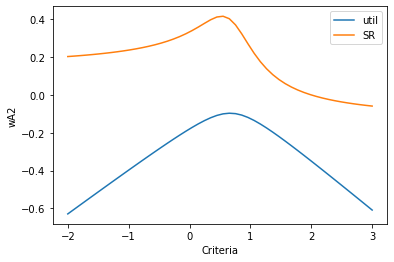

In [15]:
plt.plot(wA2, util(wA2), label='util')
plt.plot(wA2, SR(wA2), label='SR')
plt.xlabel('Criteria')
plt.ylabel('wA2')
plt.legend(loc="upper right")
plt.show()

Using newton:

In [16]:
def newton2 (num,root):
    for iter in range(10):
        if iter==0:
            x=1
        f = x**root - num
        g = root*(x**(root-1))
        x = x-(f/g)
    return x
#print(newton(9,3))
def std_p2(ss): return (newton2((ss**2*stdA**2 + ((1-ss)**2)*stdB**2),2))

In [17]:
risk_aversion = 0.7 #
risk_free = 0
def util2(wA):
    results_util = []
    for i in wA:
        final = (1-risk_aversion)*rp(i) - risk_aversion*std_p2(i)
        results_util.append(final)
    return results_util


def SR2(wA):
    results_SR=[]
    for i in wA:
        final2 = (rp(i)-risk_free)/std_p2(i)
        results_SR.append(final2)
    return results_SR

In [18]:
wA2 = np.linspace(-2.0,3.0)
util2(wA2)
SR2(wA2)

[0.20306923302672383,
 0.20544904443602652,
 0.20800789083725896,
 0.2107662632412861,
 0.21374780530706264,
 0.2169799182398392,
 0.22049450188099134,
 0.22432886545925027,
 0.228526849195255,
 0.23314020628390367,
 0.23823030223144462,
 0.24387019143868327,
 0.2501471210070688,
 0.25716547088971853,
 0.26505002882419215,
 0.27394923504895724,
 0.28403743934499315,
 0.2955139181914497,
 0.30859362176203414,
 0.32347877768513705,
 0.3402886292674572,
 0.3589024597432513,
 0.37863791994517393,
 0.39767086061488444,
 0.4122406246210728,
 0.4162952139654227,
 0.40324945621301317,
 0.370630678469551,
 0.32338083338177726,
 0.27072565545768595,
 0.22033036838033437,
 0.17596728589673988,
 0.13847382958361693,
 0.10728763329994333,
 0.08141394703764042,
 0.05985651633507163,
 0.04176136698049357,
 0.026439863291314064,
 0.013350221331816566,
 0.00206951089661199,
 -0.007732620109346834,
 -0.01631548906745852,
 -0.023884108859621573,
 -0.030601884333863013,
 -0.03660016758340102,
 -0.04198544

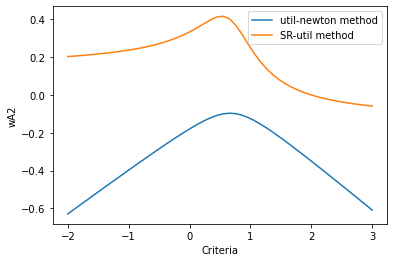

In [19]:
plt.plot(wA2, util(wA2), label='util-newton method')
plt.plot(wA2, SR(wA2), label='SR-util method')
plt.xlabel('Criteria')
plt.ylabel('wA2')
plt.legend(loc="upper right")
plt.show()